In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



gas_data = pd.read_csv("C:/Users/vighn/OneDrive - SASsoft/MILAN_APPLIED_RESEARCH/Project/DB elder monitoring/database_gas.csv")
baseline_data = pd.read_csv("C:/Users/vighn/OneDrive - SASsoft/MILAN_APPLIED_RESEARCH/Project/DB elder monitoring/data_ref_until_2020-02-13.csv")
pos_data = pd.read_csv("C:/Users/vighn/OneDrive - SASsoft/MILAN_APPLIED_RESEARCH/Project/DB elder monitoring/database_pos.csv")


In [3]:
print("Gas Data:")
print(gas_data.head())




Gas Data:
                          timestamp  temperature  humidity  CO2CosIRValue  \
0  2019-11-06 11:37:13.038174+01:00        19.48     54.86          128.0   
1  2019-11-06 11:37:32.744996+01:00        19.59     54.23          129.0   
2  2019-11-06 11:37:53.018087+01:00        19.63     54.05          128.0   
3  2019-11-06 11:38:13.093151+01:00        19.64     53.74          128.0   
4  2019-11-06 11:38:33.032832+01:00        19.67     53.53          128.0   

   CO2MG811Value   MOX1   MOX2   MOX3   MOX4  COValue  
0          563.0  476.0  731.0  649.0  565.0    128.0  
1          563.0  477.0  731.0  649.0  565.0    125.0  
2          566.0  478.0  732.0  649.0  565.0    125.0  
3          566.0  478.0  732.0  649.0  565.0    125.0  
4          569.0  480.0  732.0  650.0  565.0    125.0  


In [4]:
print("\nBaseline Data:")
print(baseline_data.head())



Baseline Data:
                          timestamp  temperature  humidity  CO2CosIRValue  \
0  2020-01-25 00:01:49.251503+01:00        20.64     55.57          121.0   
1  2020-01-25 00:02:09.350082+01:00        20.64     55.53          122.0   
2  2020-01-25 00:02:29.319505+01:00        20.62     55.53          121.0   
3  2020-01-25 00:02:49.399379+01:00        20.62     55.57          121.0   
4  2020-01-25 00:03:09.158989+01:00        20.62     55.59          121.0   

   CO2MG811Value   MOX1   MOX2   MOX3   MOX4  COValue  
0          496.0  521.0  694.0  652.0  591.0    135.0  
1          495.0  521.0  694.0  652.0  591.0    135.0  
2          495.0  522.0  694.0  651.0  591.0    135.0  
3          495.0  522.0  694.0  651.0  591.0    135.0  
4          495.0  522.0  694.0  652.0  591.0    135.0  


In [5]:

print("\nPosition Data:")
print(pos_data.head())


Position Data:
                              datetime  Living room  Bedroom  Bathroom  \
0  2019-11-01 02:52:55.271086300+00:00          NaN      0.0       NaN   
1  2019-11-01 03:19:57.417067700+00:00          NaN      1.0       NaN   
2  2019-11-01 03:21:53.257070700+00:00          NaN      0.0       NaN   
3     2019-11-01 05:11:08.874031+00:00          NaN      1.0       NaN   
4  2019-11-01 05:12:38.437033500+00:00          NaN      0.0       NaN   

   Kitchen  Hallway  
0      NaN      NaN  
1      NaN      NaN  
2      NaN      NaN  
3      NaN      NaN  
4      NaN      NaN  


In [6]:

numerical_columns = ['temperature', 'humidity', 'CO2CosIRValue', 'CO2MG811Value', 
                    'MOX1', 'MOX2', 'MOX3', 'MOX4', 'COValue']


gas_data['timestamp'] = pd.to_datetime(gas_data['timestamp'])
gas_data.set_index('timestamp', inplace=True)

C:\Users\vighn\AppData\Local\Temp\ipykernel_624\2197370227.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\vighn\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


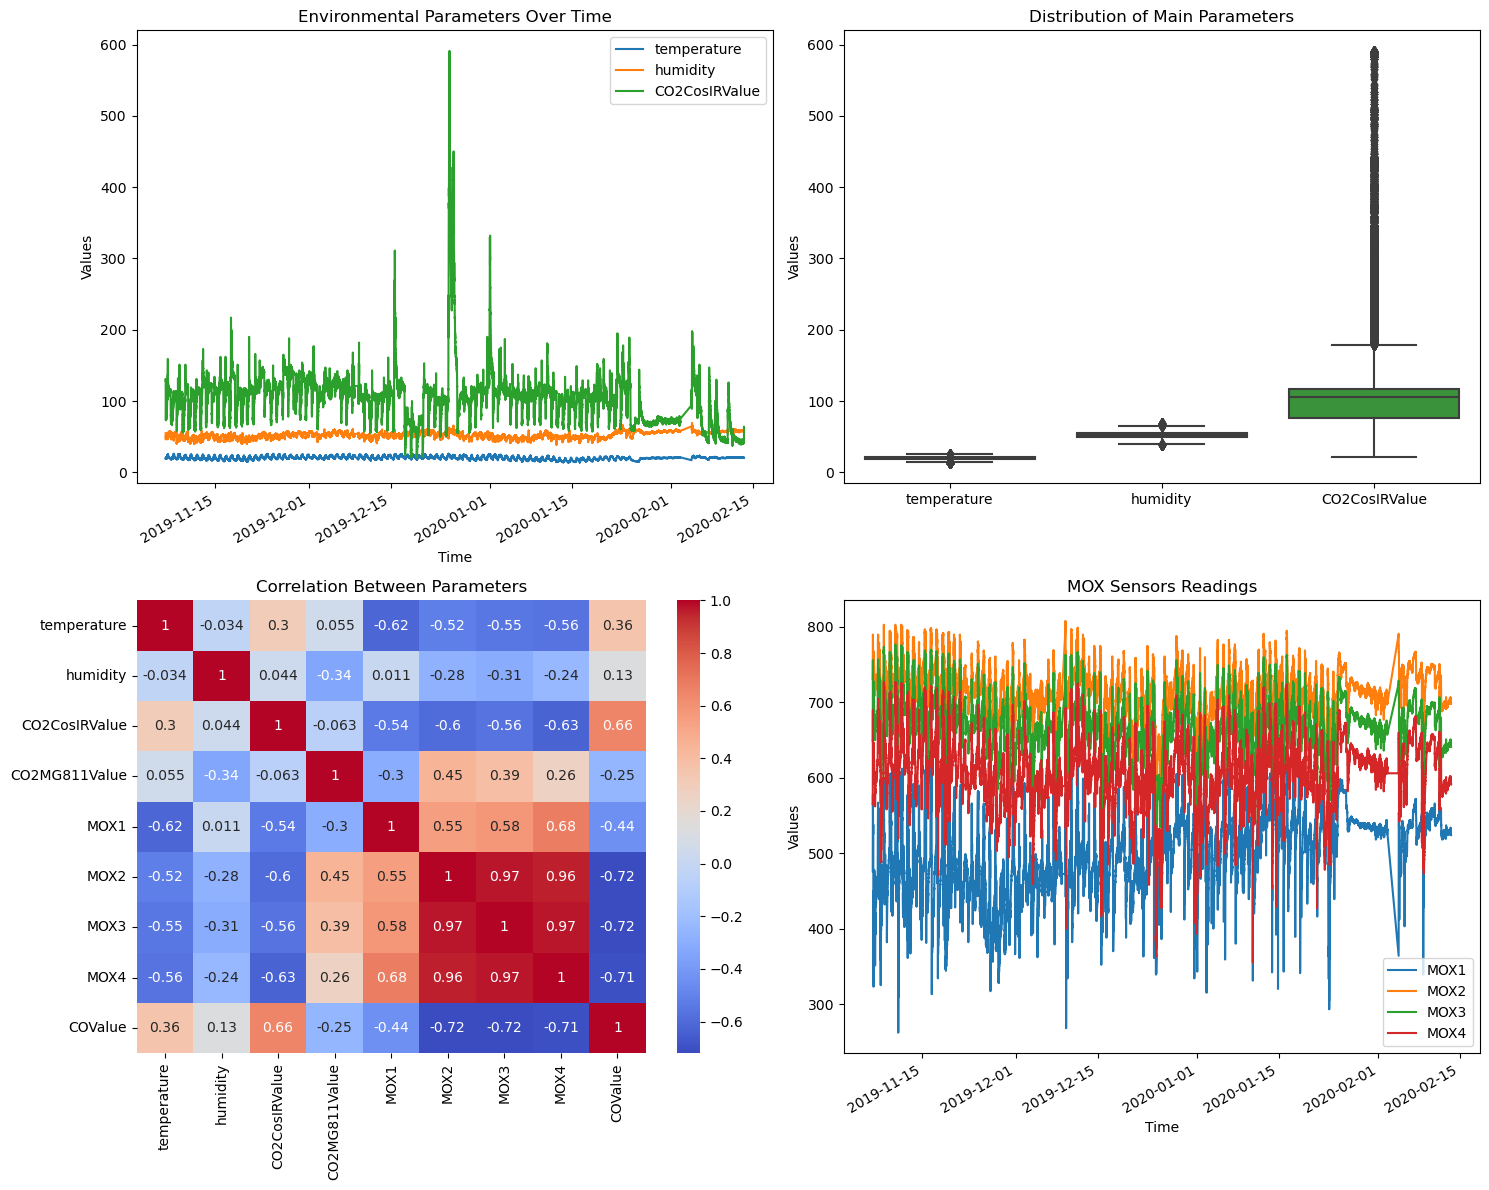

In [7]:

fig, axes = plt.subplots(2, 2, figsize=(15, 12))


ax1 = axes[0,0]
gas_data[['temperature', 'humidity', 'CO2CosIRValue']].plot(ax=ax1)
ax1.set_title('Environmental Parameters Over Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Values')
ax1.legend()


ax2 = axes[0,1]
sns.boxplot(data=gas_data[['temperature', 'humidity', 'CO2CosIRValue']], ax=ax2)
ax2.set_title('Distribution of Main Parameters')
ax2.set_ylabel('Values')


ax3 = axes[1,0]
correlation = gas_data[numerical_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=ax3)
ax3.set_title('Correlation Between Parameters')


ax4 = axes[1,1]
gas_data[['MOX1', 'MOX2', 'MOX3', 'MOX4']].plot(ax=ax4)
ax4.set_title('MOX Sensors Readings')
ax4.set_xlabel('Time')
ax4.set_ylabel('Values')
ax4.legend()

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

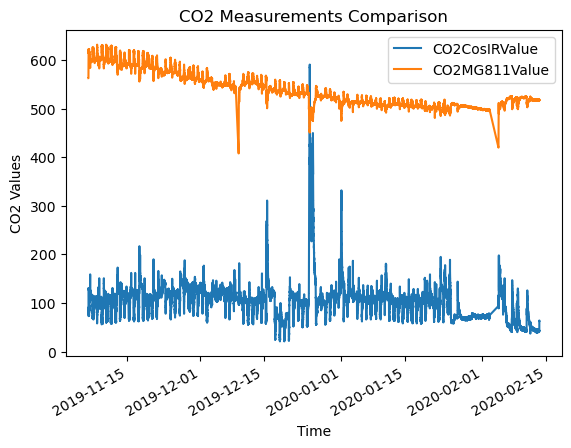

In [ ]:

plt.figure(figsize=(12, 6))
gas_data[['CO2CosIRValue', 'CO2MG811Value']].plot()
plt.title('CO2 Measurements Comparison')
plt.xlabel('Time')
plt.ylabel('CO2 Values')
plt.legend()
plt.show()

In [ ]:



print("Formatting timestamps...")


print("Fixing timestamp and timezone issues...")


if 'timestamp' in gas_data.columns:
    gas_data['timestamp'] = pd.to_datetime(gas_data['timestamp'])
    gas_data.set_index('timestamp', inplace=True)
elif gas_data.index.dtype != 'datetime64[ns]':
    gas_data.index = pd.to_datetime(gas_data.index)


if 'timestamp' in baseline_data.columns:
    baseline_data['timestamp'] = pd.to_datetime(baseline_data['timestamp'])
    baseline_data.set_index('timestamp', inplace=True)
elif baseline_data.index.dtype != 'datetime64[ns]':
    baseline_data.index = pd.to_datetime(baseline_data.index)


if 'datetime' in pos_data.columns:
    
    pos_data['datetime'] = pd.to_datetime(pos_data['datetime'])
    pos_data.set_index('datetime', inplace=True)
    

gas_data = gas_data.tz_convert('UTC').tz_localize(None)
baseline_data = baseline_data.tz_convert('UTC').tz_localize(None)


if pos_data.index.tz is not None:
    pos_data = pos_data.tz_convert('UTC').tz_localize(None)


print("\nHandling missing values in position data...")
print("Missing values before filling:", pos_data.isnull().sum())


pos_data_filled = pos_data.ffill().bfill()
print("Missing values after filling:", pos_data_filled.isnull().sum())


print("\nComputing baseline statistics...")
baseline_mean = baseline_data.mean()
baseline_std = baseline_data.std()

print("Baseline mean values:")
display(baseline_mean)
print("\nBaseline standard deviation values:")
display(baseline_std)


gas_data_standardized = pd.DataFrame()

for column in gas_data.columns:
    if column in baseline_mean.index:
        gas_data_standardized[column] = (gas_data[column] - baseline_mean[column]) / baseline_std[column]
    else:
        gas_data_standardized[column] = gas_data[column]

print("\nSample of standardized gas data:")
display(gas_data_standardized.head())


print("\nResampling datasets...")


resample_freq = '1h'


gas_data_resampled = gas_data.resample(resample_freq).mean()
print(f"Gas data resampled to {resample_freq}:")
display(gas_data_resampled.head())


gas_data_std_resampled = gas_data_standardized.resample(resample_freq).mean()


pos_data_resampled = pos_data_filled.resample(resample_freq).max()
print(f"\nPosition data resampled to {resample_freq}:")
display(pos_data_resampled.head())



start_time = max(gas_data_resampled.index.min(), pos_data_resampled.index.min())
end_time = min(gas_data_resampled.index.max(), pos_data_resampled.index.max())

print(f"\nCommon time range: {start_time} to {end_time}")
print(f"This gives us {(end_time - start_time).days} days of aligned data")


print("\nCreating merged dataset...")
gas_pos_merged = pd.merge(
    gas_data_resampled.loc[start_time:end_time], 
    pos_data_resampled.loc[start_time:end_time],
    left_index=True, 
    right_index=True,
    how='inner'
)

print("Merged dataset shape:", gas_pos_merged.shape)
display(gas_pos_merged.head())


gas_data_standardized = pd.DataFrame()

for column in gas_data.columns:
    if column in baseline_mean.index:
        gas_data_standardized[column] = (gas_data[column] - baseline_mean[column]) / baseline_std[column]
    else:
        gas_data_standardized[column] = gas_data[column]

print("\nSample of standardized gas data:")
display(gas_data_standardized.head())


print("\nResampling datasets...")


resample_freq = '1H'


gas_data_resampled = gas_data.resample(resample_freq).mean()
print(f"Gas data resampled to {resample_freq}:")
display(gas_data_resampled.head())


gas_data_std_resampled = gas_data_standardized.resample(resample_freq).mean()


pos_data_resampled = pos_data_filled.resample(resample_freq).max()
print(f"\nPosition data resampled to {resample_freq}:")
display(pos_data_resampled.head())


start_time = max(gas_data_resampled.index.min(), pos_data_resampled.index.min())
end_time = min(gas_data_resampled.index.max(), pos_data_resampled.index.max())

print(f"\nCommon time range: {start_time} to {end_time}")
print(f"This gives us {(end_time - start_time).days} days of aligned data")

Formatting timestamps...
Fixing timestamp and timezone issues...

Handling missing values in position data...
Missing values before filling: Living room    19612
Bedroom        25317
Bathroom       22525
Kitchen        25957
Hallway        20530
dtype: int64
Missing values after filling: Living room    0
Bedroom        0
Bathroom       0
Kitchen        0
Hallway        0
dtype: int64

Computing baseline statistics...
Baseline mean values:


temperature       20.025767
humidity          56.690943
CO2CosIRValue     70.176226
CO2MG811Value    510.003523
MOX1             538.731390
MOX2             724.035849
MOX3             675.748619
MOX4             625.210473
COValue          114.237290
dtype: float64


Baseline standard deviation values:


temperature       1.404978
humidity          2.416317
CO2CosIRValue    22.969229
CO2MG811Value     9.233296
MOX1             21.364820
MOX2             19.940654
MOX3             22.754632
MOX4             27.964882
COValue          21.903941
dtype: float64


Sample of standardized gas data:


,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue
timestamp,,,,,,,,,
2019-11-06 10:37:13.038174,-0.388453,-0.757741,2.517445,5.739714,-2.936200,0.349244,-1.175524,-2.153074,0.628321
2019-11-06 10:37:32.744996,-0.310160,-1.018468,2.560982,5.739714,-2.889394,0.349244,-1.175524,-2.153074,0.491360
2019-11-06 10:37:53.018087,-0.281689,-1.092962,2.517445,6.064625,-2.842588,0.399393,-1.175524,-2.153074,0.491360
2019-11-06 10:38:13.093151,-0.274572,-1.221256,2.517445,6.064625,-2.842588,0.399393,-1.175524,-2.153074,0.491360
2019-11-06 10:38:33.032832,-0.253219,-1.308165,2.517445,6.389536,-2.748977,0.399393,-1.131577,-2.153074,0.491360



Resampling datasets...
Gas data resampled to 1h:


,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue
timestamp,,,,,,,,,
2019-11-06 10:00:00,19.792464,51.985072,117.043478,586.985507,508.275362,744.057971,671.739130,585.492754,112.362319
2019-11-06 11:00:00,19.533222,49.122222,80.866667,617.844444,555.238889,776.822222,731.605556,653.811111,94.527778
2019-11-06 12:00:00,19.699111,51.239833,84.727778,616.772222,530.872222,760.505556,705.661111,622.116667,95.533333
2019-11-06 13:00:00,20.202778,49.903167,81.994444,618.461111,427.705556,757.966667,707.561111,625.294444,111.450000
2019-11-06 14:00:00,20.311944,50.692444,85.977778,615.988889,385.505556,753.555556,702.250000,621.472222,107.855556



Position data resampled to 1h:


,Living room,Bedroom,Bathroom,Kitchen,Hallway
datetime,,,,,
2019-11-01 02:00:00,0.0,0.0,0.0,0.0,0.0
2019-11-01 03:00:00,0.0,1.0,0.0,0.0,0.0
2019-11-01 04:00:00,NaN,NaN,NaN,NaN,NaN
2019-11-01 05:00:00,0.0,1.0,0.0,0.0,0.0
2019-11-01 06:00:00,0.0,1.0,1.0,0.0,0.0



Common time range: 2019-11-06 10:00:00 to 2020-02-13 10:00:00
This gives us 99 days of aligned data

Creating merged dataset...
Merged dataset shape: (2377, 14)


,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue,Living room,Bedroom,Bathroom,Kitchen,Hallway
timestamp,,,,,,,,,,,,,,
2019-11-06 10:00:00,19.792464,51.985072,117.043478,586.985507,508.275362,744.057971,671.739130,585.492754,112.362319,1.0,1.0,1.0,1.0,1.0
2019-11-06 11:00:00,19.533222,49.122222,80.866667,617.844444,555.238889,776.822222,731.605556,653.811111,94.527778,0.0,0.0,0.0,1.0,0.0
2019-11-06 12:00:00,19.699111,51.239833,84.727778,616.772222,530.872222,760.505556,705.661111,622.116667,95.533333,1.0,0.0,1.0,1.0,1.0
2019-11-06 13:00:00,20.202778,49.903167,81.994444,618.461111,427.705556,757.966667,707.561111,625.294444,111.450000,0.0,0.0,0.0,1.0,0.0
2019-11-06 14:00:00,20.311944,50.692444,85.977778,615.988889,385.505556,753.555556,702.250000,621.472222,107.855556,1.0,0.0,1.0,0.0,1.0



Sample of standardized gas data:


,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue
timestamp,,,,,,,,,
2019-11-06 10:37:13.038174,-0.388453,-0.757741,2.517445,5.739714,-2.936200,0.349244,-1.175524,-2.153074,0.628321
2019-11-06 10:37:32.744996,-0.310160,-1.018468,2.560982,5.739714,-2.889394,0.349244,-1.175524,-2.153074,0.491360
2019-11-06 10:37:53.018087,-0.281689,-1.092962,2.517445,6.064625,-2.842588,0.399393,-1.175524,-2.153074,0.491360
2019-11-06 10:38:13.093151,-0.274572,-1.221256,2.517445,6.064625,-2.842588,0.399393,-1.175524,-2.153074,0.491360
2019-11-06 10:38:33.032832,-0.253219,-1.308165,2.517445,6.389536,-2.748977,0.399393,-1.131577,-2.153074,0.491360



Resampling datasets...
Gas data resampled to 1H:


,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue
timestamp,,,,,,,,,
2019-11-06 10:00:00,19.792464,51.985072,117.043478,586.985507,508.275362,744.057971,671.739130,585.492754,112.362319
2019-11-06 11:00:00,19.533222,49.122222,80.866667,617.844444,555.238889,776.822222,731.605556,653.811111,94.527778
2019-11-06 12:00:00,19.699111,51.239833,84.727778,616.772222,530.872222,760.505556,705.661111,622.116667,95.533333
2019-11-06 13:00:00,20.202778,49.903167,81.994444,618.461111,427.705556,757.966667,707.561111,625.294444,111.450000
2019-11-06 14:00:00,20.311944,50.692444,85.977778,615.988889,385.505556,753.555556,702.250000,621.472222,107.855556



Position data resampled to 1H:


,Living room,Bedroom,Bathroom,Kitchen,Hallway
datetime,,,,,
2019-11-01 02:00:00,0.0,0.0,0.0,0.0,0.0
2019-11-01 03:00:00,0.0,1.0,0.0,0.0,0.0
2019-11-01 04:00:00,NaN,NaN,NaN,NaN,NaN
2019-11-01 05:00:00,0.0,1.0,0.0,0.0,0.0
2019-11-01 06:00:00,0.0,1.0,1.0,0.0,0.0



Common time range: 2019-11-06 10:00:00 to 2020-02-13 10:00:00
This gives us 99 days of aligned data


In [ ]:
import pandas as pd
import numpy as np





print("Step 1: Adding features...")


gas_pos_merged['hour'] = gas_pos_merged.index.hour
gas_pos_merged['day_of_week'] = gas_pos_merged.index.dayofweek 


room_cols = ['Living room', 'Bedroom', 'Bathroom', 'Kitchen', 'Hallway']

existing_room_cols = [col for col in room_cols if col in gas_pos_merged.columns]
if existing_room_cols:
    gas_pos_merged['any_activity'] = gas_pos_merged[existing_room_cols].max(axis=1)
    
    gas_pos_merged['any_activity'].fillna(0, inplace=True)
else:
    print("Warning: No room columns found to create 'any_activity' feature.")
    gas_pos_merged['any_activity'] = 0 

print("Features added.")
print(gas_pos_merged[['hour', 'day_of_week', 'any_activity']].head())


print("\nStep 2: Standardizing environmental sensor columns in merged data...")


env_cols_to_standardize = baseline_mean.index.tolist()
standardized_cols = {}

for col in env_cols_to_standardize:
    if col in gas_pos_merged.columns:
        
        standardized_col_name = f'standardized_{col}'
        gas_pos_merged[standardized_col_name] = (gas_pos_merged[col] - baseline_mean[col]) / baseline_std[col]
        standardized_cols[col] = standardized_col_name
        print(f" - Standardized '{col}' as '{standardized_col_name}'")
    else:
        print(f" - Warning: Column '{col}' from baseline not found in merged data.")

print("Standardization complete.")

std_cols_to_show = [std_name for std_name in standardized_cols.values() if std_name in gas_pos_merged.columns]
if std_cols_to_show:
    print(gas_pos_merged[std_cols_to_show].head())
else:
     print("No standardized columns to display.")


print("\nStep 3: Implementing anomaly detection rules...")








co_thresh = 3.5
mox_thresh = 4.0
gas_duration_window = 1 + 1
gas_pos_merged['anomaly_high_gas'] = False 
if 'standardized_COValue' in gas_pos_merged.columns:
    cond_co = (gas_pos_merged['standardized_COValue'] > co_thresh).rolling(window=gas_duration_window).sum() == gas_duration_window
    gas_pos_merged['anomaly_high_gas'] = gas_pos_merged['anomaly_high_gas'] | cond_co

mox_cols_std = [f'standardized_MOX{i}' for i in range(1, 5) if f'standardized_MOX{i}' in gas_pos_merged.columns]
if mox_cols_std:
    cond_mox = (gas_pos_merged[mox_cols_std] > mox_thresh).any(axis=1).rolling(window=gas_duration_window).sum() == gas_duration_window
    gas_pos_merged['anomaly_high_gas'] = gas_pos_merged['anomaly_high_gas'] | cond_mox
print(" - Rule 1 (High Gas) applied.")


co2_thresh = 3.0
vent_duration_window = 2 + 1
gas_pos_merged['anomaly_poor_vent'] = False 
co2_cols_std = [col for col in ['standardized_CO2CosIRValue', 'standardized_CO2MG811Value'] if col in gas_pos_merged.columns]
if co2_cols_std:
    cond_co2 = (gas_pos_merged[co2_cols_std] > co2_thresh).any(axis=1).rolling(window=vent_duration_window).sum() == vent_duration_window
    gas_pos_merged['anomaly_poor_vent'] = cond_co2
print(" - Rule 2 (Poor Vent) applied.")


temp_low_abs = 18.0
temp_low_std = -3.0
temp_duration_window = 2 + 1
gas_pos_merged['anomaly_low_temp'] = False 
if 'temperature' in gas_pos_merged.columns and 'standardized_temperature' in gas_pos_merged.columns:
    cond_temp_low = (
        ((gas_pos_merged['temperature'] < temp_low_abs) | (gas_pos_merged['standardized_temperature'] < temp_low_std))
        .rolling(window=temp_duration_window).sum() == temp_duration_window
    )
    gas_pos_merged['anomaly_low_temp'] = cond_temp_low
print(" - Rule 3 (Low Temp) applied.")


temp_high_abs = 28.0
temp_high_std = 3.0

gas_pos_merged['anomaly_high_temp'] = False 
if 'temperature' in gas_pos_merged.columns and 'standardized_temperature' in gas_pos_merged.columns:
    cond_temp_high = (
        ((gas_pos_merged['temperature'] > temp_high_abs) | (gas_pos_merged['standardized_temperature'] > temp_high_std))
        .rolling(window=temp_duration_window).sum() == temp_duration_window
    )
    gas_pos_merged['anomaly_high_temp'] = cond_temp_high
print(" - Rule 4 (High Temp) applied.")


inactivity_duration_window = 4 + 1
start_hour = 8
end_hour = 22 
gas_pos_merged['anomaly_inactivity'] = False 
if 'any_activity' in gas_pos_merged.columns and 'hour' in gas_pos_merged.columns:
    
    is_daytime = (gas_pos_merged['hour'] >= start_hour) & (gas_pos_merged['hour'] <= end_hour)
    is_inactive = gas_pos_merged['any_activity'] == 0
    
    daytime_inactive = is_daytime & is_inactive
    
    
    
    cond_inactivity_rolling = (is_inactive.rolling(window=inactivity_duration_window).sum() == inactivity_duration_window)
    
    cond_inactivity = cond_inactivity_rolling & is_daytime
    gas_pos_merged['anomaly_inactivity'] = cond_inactivity
print(" - Rule 5 (Inactivity) applied.")

print("\nAnomaly detection rules implemented.")


print("\nStep 4: Analyzing detected anomalies...")


anomaly_cols = [col for col in gas_pos_merged.columns if col.startswith('anomaly_')]
anomaly_counts = gas_pos_merged[anomaly_cols].sum()

print("Total hours flagged for each anomaly type:")
print(anomaly_counts)


any_anomaly = gas_pos_merged[anomaly_cols].any(axis=1)
print(f"\nTotal hours with at least one anomaly flagged: {any_anomaly.sum()}")

print("\nSample of data points flagged with any anomaly:")
display(gas_pos_merged[any_anomaly].head(10))







Step 1: Adding features...
Features added.
                     hour  day_of_week  any_activity
timestamp                                           
2019-11-06 10:00:00    10            2           1.0
2019-11-06 11:00:00    11            2           1.0
2019-11-06 12:00:00    12            2           1.0
2019-11-06 13:00:00    13            2           1.0
2019-11-06 14:00:00    14            2           1.0

Step 2: Standardizing environmental sensor columns in merged data...
 - Standardized 'temperature' as 'standardized_temperature'
 - Standardized 'humidity' as 'standardized_humidity'
 - Standardized 'CO2CosIRValue' as 'standardized_CO2CosIRValue'
 - Standardized 'CO2MG811Value' as 'standardized_CO2MG811Value'
 - Standardized 'MOX1' as 'standardized_MOX1'
 - Standardized 'MOX2' as 'standardized_MOX2'
 - Standardized 'MOX3' as 'standardized_MOX3'
 - Standardized 'MOX4' as 'standardized_MOX4'
 - Standardized 'COValue' as 'standardized_COValue'
Standardization complete.
            

,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue,Living room,...,standardized_MOX1,standardized_MOX2,standardized_MOX3,standardized_MOX4,standardized_COValue,anomaly_high_gas,anomaly_poor_vent,anomaly_low_temp,anomaly_high_temp,anomaly_inactivity
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-11-06 12:00:00,19.699111,51.239833,84.727778,616.772222,530.872222,760.505556,705.661111,622.116667,95.533333,1.0,...,-0.367856,1.828912,1.314567,-0.110632,-0.853908,False,True,False,False,False
2019-11-06 13:00:00,20.202778,49.903167,81.994444,618.461111,427.705556,757.966667,707.561111,625.294444,111.450000,0.0,...,-5.196666,1.701590,1.398067,0.003003,-0.127251,False,True,False,False,False
2019-11-06 14:00:00,20.311944,50.692444,85.977778,615.988889,385.505556,753.555556,702.250000,621.472222,107.855556,1.0,...,-7.171876,1.480378,1.164659,-0.133677,-0.291351,False,True,False,False,False
2019-11-06 15:00:00,19.517598,53.560223,86.983240,616.396648,409.351955,751.960894,699.815642,621.206704,108.284916,1.0,...,-6.055723,1.400408,1.057676,-0.143171,-0.271749,False,True,False,False,False
2019-11-06 16:00:00,21.391667,51.769722,94.544444,611.138889,472.061111,745.366667,692.733333,618.666667,116.255556,NaN,...,-3.120564,1.069715,0.746429,-0.234001,0.092142,False,True,False,False,False
2019-11-06 17:00:00,22.842500,51.129167,104.577778,605.950000,469.477778,736.366667,683.661111,606.938889,118.938889,NaN,...,-3.241479,0.618376,0.347731,-0.653376,0.214646,False,True,False,False,False
2019-11-06 18:00:00,24.203611,48.901778,105.433333,603.805556,464.738889,733.011111,680.527778,603.727778,119.994444,1.0,...,-3.463287,0.450099,0.210030,-0.768203,0.262836,False,True,False,False,False
2019-11-06 19:00:00,24.190111,48.952722,121.872222,597.816667,453.261111,729.372222,676.494444,598.855556,129.994444,1.0,...,-4.000515,0.267613,0.032777,-0.942429,0.719375,False,True,False,False,False
2019-11-06 20:00:00,24.564444,48.757667,119.494444,596.644444,410.477778,715.938889,660.083333,580.944444,161.183333,1.0,...,-6.003028,-0.406053,-0.688444,-1.582915,2.143269,False,True,False,False,False


In [ ]:

import pandas as pd




poor_vent_periods = gas_pos_merged[gas_pos_merged['anomaly_poor_vent']]


co2_cols_std = [col for col in ['standardized_CO2CosIRValue', 'standardized_CO2MG811Value'] if col in poor_vent_periods.columns]

if co2_cols_std:
    print("Statistics for Standardized CO2 during 'anomaly_poor_vent' periods:")
    print(poor_vent_periods[co2_cols_std].describe())

    print("\nDistribution of Max CO2 Z-score during flagged periods:")
    
    max_co2_z_during_anomaly = poor_vent_periods[co2_cols_std].max(axis=1)

    
    perc_over_3 = (max_co2_z_during_anomaly > 3.0).mean() * 100
    perc_over_3_5 = (max_co2_z_during_anomaly > 3.5).mean() * 100
    perc_over_4 = (max_co2_z_during_anomaly > 4.0).mean() * 100

    print(f"\nWithin the {len(poor_vent_periods)} flagged hours:")
    print(f" - Percentage of hours with Max CO2 Z-score > 3.0: {perc_over_3:.2f}%")
    print(f" - Percentage of hours with Max CO2 Z-score > 3.5: {perc_over_3_5:.2f}%")
    print(f" - Percentage of hours with Max CO2 Z-score > 4.0: {perc_over_4:.2f}%")

else:
    print("Standardized CO2 columns not found.")

Statistics for Standardized CO2 during 'anomaly_poor_vent' periods:
       standardized_CO2CosIRValue  standardized_CO2MG811Value
count                 1054.000000                 1054.000000
mean                     1.960496                    6.396422
std                      2.020014                    3.153570
min                     -2.068884                   -6.131574
25%                      1.222476                    4.394793
50%                      1.827029                    6.372087
75%                      2.341425                    8.662560
max                     21.076816                   12.997264

Distribution of Max CO2 Z-score during flagged periods:

Within the 1054 flagged hours:
 - Percentage of hours with Max CO2 Z-score > 3.0: 100.00%
 - Percentage of hours with Max CO2 Z-score > 3.5: 94.69%
 - Percentage of hours with Max CO2 Z-score > 4.0: 87.38%


Generating plot...


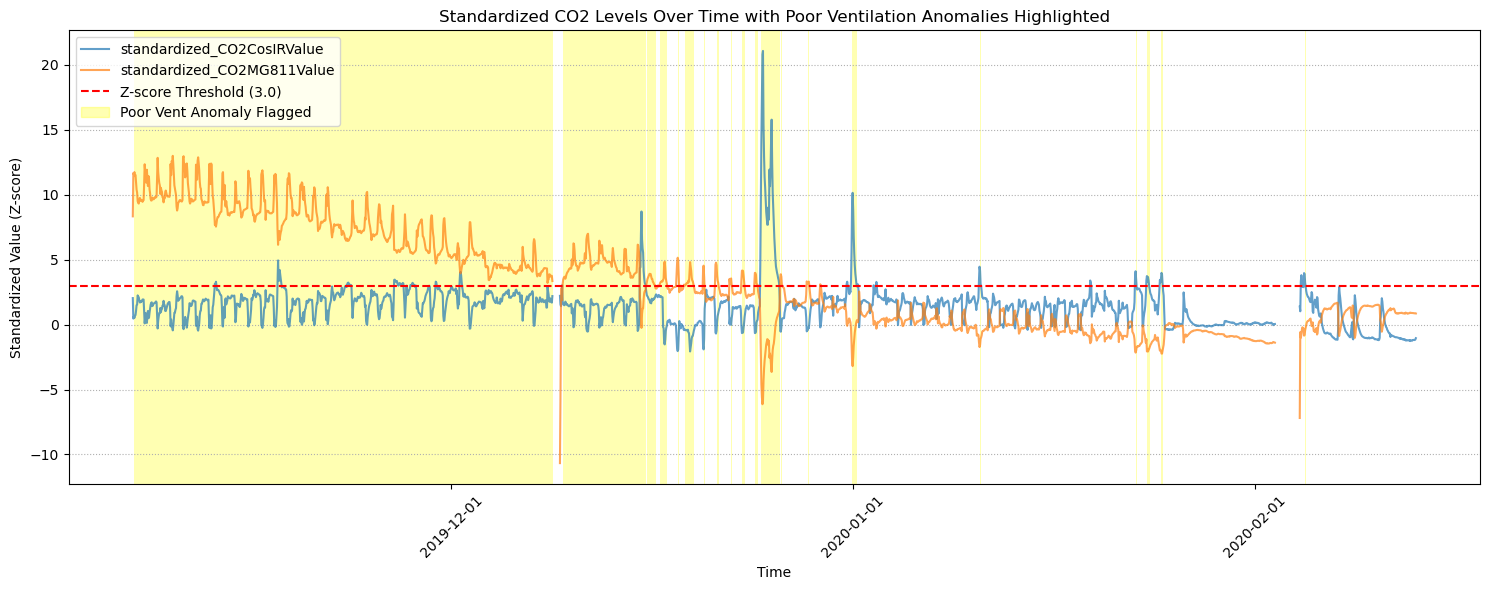

Plot generated.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd 




co2_cols_std_plot = [col for col in ['standardized_CO2CosIRValue', 'standardized_CO2MG811Value'] if col in gas_pos_merged.columns]

if not co2_cols_std_plot:
    print("Standardized CO2 columns not found for plotting.")
else:
    print("Generating plot...")
    fig, ax = plt.subplots(figsize=(15, 6))

    
    for col in co2_cols_std_plot:
        ax.plot(gas_pos_merged.index, gas_pos_merged[col], label=col, alpha=0.7)

    
    ax.axhline(3, color='red', linestyle='--', label='Z-score Threshold (3.0)')

    
    
    highlight = gas_pos_merged['anomaly_poor_vent']

    
    start_points = gas_pos_merged.index[highlight & ~highlight.shift(1).fillna(False)]
    end_points = gas_pos_merged.index[highlight & ~highlight.shift(-1).fillna(False)]

    
    min_len = min(len(start_points), len(end_points))
    start_points = start_points[:min_len]
    end_points = end_points[:min_len]

    
    for start, end in zip(start_points, end_points):
        
        ax.axvspan(start, end + pd.Timedelta(hours=1), color='yellow', alpha=0.3, lw=0, label='_nolegend_') 

    
    if not poor_vent_periods.empty:
         ax.fill_between([], [], color='yellow', alpha=0.3, label='Poor Vent Anomaly Flagged')


    
    ax.set_title('Standardized CO2 Levels Over Time with Poor Ventilation Anomalies Highlighted')
    ax.set_xlabel('Time')
    ax.set_ylabel('Standardized Value (Z-score)')
    ax.legend()
    ax.grid(True, axis='y', linestyle=':')

    
    ax.xaxis.set_major_locator(mdates.MonthLocator()) 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("Plot generated.")



In [ ]:
import pandas as pd
import numpy as np 




print("Refining Rule 2 (Poor Vent) threshold and re-running analysis...")







co2_thresh_new = 4.0 
vent_duration_window = 2 + 1
gas_pos_merged['anomaly_poor_vent'] = False 
co2_cols_std = [col for col in ['standardized_CO2CosIRValue', 'standardized_CO2MG811Value'] if col in gas_pos_merged.columns]

if co2_cols_std:
    cond_co2_new = (
        (gas_pos_merged[co2_cols_std] > co2_thresh_new)
        .any(axis=1)
        .rolling(window=vent_duration_window).sum() == vent_duration_window
    )
    gas_pos_merged['anomaly_poor_vent'] = cond_co2_new 
    print(f" - Rule 2 (Poor Vent) re-applied with Z-score threshold > {co2_thresh_new}.")
else:
    print(" - Warning: Standardized CO2 columns not found for Rule 2.")


print("\nStep 4: Re-analyzing detected anomalies...")


anomaly_cols = [col for col in gas_pos_merged.columns if col.startswith('anomaly_')]
anomaly_counts = gas_pos_merged[anomaly_cols].sum()

print("Total hours flagged for each anomaly type (UPDATED):")
print(anomaly_counts)


any_anomaly = gas_pos_merged[anomaly_cols].any(axis=1)
print(f"\nTotal hours with at least one anomaly flagged (UPDATED): {any_anomaly.sum()}")

print("\nSample of data points flagged with any anomaly (using updated rules):")


display(gas_pos_merged[any_anomaly].head(10))







Refining Rule 2 (Poor Vent) threshold and re-running analysis...
 - Rule 2 (Poor Vent) re-applied with Z-score threshold > 4.0.

Step 4: Re-analyzing detected anomalies...
Total hours flagged for each anomaly type (UPDATED):
anomaly_high_gas       45
anomaly_poor_vent     899
anomaly_low_temp      308
anomaly_high_temp      23
anomaly_inactivity    182
dtype: int64

Total hours with at least one anomaly flagged (UPDATED): 1318

Sample of data points flagged with any anomaly (using updated rules):


,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue,Living room,...,standardized_MOX1,standardized_MOX2,standardized_MOX3,standardized_MOX4,standardized_COValue,anomaly_high_gas,anomaly_poor_vent,anomaly_low_temp,anomaly_high_temp,anomaly_inactivity
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-11-06 12:00:00,19.699111,51.239833,84.727778,616.772222,530.872222,760.505556,705.661111,622.116667,95.533333,1.0,...,-0.367856,1.828912,1.314567,-0.110632,-0.853908,False,True,False,False,False
2019-11-06 13:00:00,20.202778,49.903167,81.994444,618.461111,427.705556,757.966667,707.561111,625.294444,111.450000,0.0,...,-5.196666,1.701590,1.398067,0.003003,-0.127251,False,True,False,False,False
2019-11-06 14:00:00,20.311944,50.692444,85.977778,615.988889,385.505556,753.555556,702.250000,621.472222,107.855556,1.0,...,-7.171876,1.480378,1.164659,-0.133677,-0.291351,False,True,False,False,False
2019-11-06 15:00:00,19.517598,53.560223,86.983240,616.396648,409.351955,751.960894,699.815642,621.206704,108.284916,1.0,...,-6.055723,1.400408,1.057676,-0.143171,-0.271749,False,True,False,False,False
2019-11-06 16:00:00,21.391667,51.769722,94.544444,611.138889,472.061111,745.366667,692.733333,618.666667,116.255556,NaN,...,-3.120564,1.069715,0.746429,-0.234001,0.092142,False,True,False,False,False
2019-11-06 17:00:00,22.842500,51.129167,104.577778,605.950000,469.477778,736.366667,683.661111,606.938889,118.938889,NaN,...,-3.241479,0.618376,0.347731,-0.653376,0.214646,False,True,False,False,False
2019-11-06 18:00:00,24.203611,48.901778,105.433333,603.805556,464.738889,733.011111,680.527778,603.727778,119.994444,1.0,...,-3.463287,0.450099,0.210030,-0.768203,0.262836,False,True,False,False,False
2019-11-06 19:00:00,24.190111,48.952722,121.872222,597.816667,453.261111,729.372222,676.494444,598.855556,129.994444,1.0,...,-4.000515,0.267613,0.032777,-0.942429,0.719375,False,True,False,False,False
2019-11-06 20:00:00,24.564444,48.757667,119.494444,596.644444,410.477778,715.938889,660.083333,580.944444,161.183333,1.0,...,-6.003028,-0.406053,-0.688444,-1.582915,2.143269,False,True,False,False,False


In [ ]:
import pandas as pd





low_temp_periods = gas_pos_merged[gas_pos_merged['anomaly_low_temp']]

print(f"Analyzing {len(low_temp_periods)} hours flagged by 'anomaly_low_temp'...")


if 'temperature' in low_temp_periods.columns and 'standardized_temperature' in low_temp_periods.columns:
    print("\nStatistics for Temperature during 'anomaly_low_temp' periods:")
    
    temp_cols_to_describe = ['temperature', 'standardized_temperature']
    print(low_temp_periods[temp_cols_to_describe].describe())

    
    abs_thresh_met = (low_temp_periods['temperature'] < 18.0).mean() * 100
    std_thresh_met = (low_temp_periods['standardized_temperature'] < -3.0).mean() * 100
    both_thresh_met = ((low_temp_periods['temperature'] < 18.0) & (low_temp_periods['standardized_temperature'] < -3.0)).mean() * 100

    print(f"\nWithin the {len(low_temp_periods)} flagged hours:")
    print(f" - Percentage of hours with Temp < 18.0°C: {abs_thresh_met:.2f}%")
    print(f" - Percentage of hours with Standardized Temp < -3.0: {std_thresh_met:.2f}%")
    print(f" - Percentage of hours where BOTH conditions were met: {both_thresh_met:.2f}%")

else:
    print("Error: 'temperature' or 'standardized_temperature' column not found.")



Analyzing 308 hours flagged by 'anomaly_low_temp'...

Statistics for Temperature during 'anomaly_low_temp' periods:
       temperature  standardized_temperature
count   308.000000                308.000000
mean     16.399017                 -2.581358
std       0.925173                  0.658497
min      13.882333                 -4.372620
25%      15.767083                 -3.031140
50%      16.481694                 -2.522512
75%      17.144431                 -2.050806
max      17.960667                 -1.469846

Within the 308 flagged hours:
 - Percentage of hours with Temp < 18.0°C: 100.00%
 - Percentage of hours with Standardized Temp < -3.0: 26.30%
 - Percentage of hours where BOTH conditions were met: 26.30%


In [ ]:
import pandas as pd




inactivity_periods = gas_pos_merged[gas_pos_merged['anomaly_inactivity']]

print(f"Analyzing {len(inactivity_periods)} hours flagged by 'anomaly_inactivity'...")


if 'hour' in inactivity_periods.columns and 'day_of_week' in inactivity_periods.columns:
    print("\nDistribution of flagged hours by Hour of Day:")
    
    print(inactivity_periods['hour'].value_counts().sort_index())

    print("\nDistribution of flagged hours by Day of Week (0=Monday, 6=Sunday):")
    
    print(inactivity_periods['day_of_week'].value_counts().sort_index())

else:
    print("Error: 'hour' or 'day_of_week' column not found.")



Analyzing 182 hours flagged by 'anomaly_inactivity'...

Distribution of flagged hours by Hour of Day:
8     20
9     17
10    15
11    12
12    11
13    11
14    12
15     9
16    10
17     9
18    10
19    11
20    11
21    11
22    13
Name: hour, dtype: int64

Distribution of flagged hours by Day of Week (0=Monday, 6=Sunday):
0    39
1    21
2    20
3    28
4    22
5    23
6    29
Name: day_of_week, dtype: int64


In [ ]:
import pandas as pd
import numpy as np 




print("Refining Rule 5 (Inactivity) start time and re-running analysis...")







inactivity_duration_window = 4 + 1
start_hour_new = 10 
end_hour = 22 
gas_pos_merged['anomaly_inactivity'] = False 

if 'any_activity' in gas_pos_merged.columns and 'hour' in gas_pos_merged.columns:
    
    is_inactive = gas_pos_merged['any_activity'] == 0
    
    cond_inactivity_rolling = (is_inactive.rolling(window=inactivity_duration_window).sum() == inactivity_duration_window)

    
    is_new_daytime_end = (gas_pos_merged['hour'] >= start_hour_new) & (gas_pos_merged['hour'] <= end_hour)
    cond_inactivity_new = cond_inactivity_rolling & is_new_daytime_end
    gas_pos_merged['anomaly_inactivity'] = cond_inactivity_new 
    print(f" - Rule 5 (Inactivity) re-applied with start hour = {start_hour_new}.")
else:
    print(" - Warning: 'any_activity' or 'hour' column not found for Rule 5.")



print("\nStep 4: Re-analyzing detected anomalies...")


anomaly_cols = [col for col in gas_pos_merged.columns if col.startswith('anomaly_')]
anomaly_counts = gas_pos_merged[anomaly_cols].sum()

print("Total hours flagged for each anomaly type (UPDATED):")
print(anomaly_counts)


any_anomaly = gas_pos_merged[anomaly_cols].any(axis=1)
print(f"\nTotal hours with at least one anomaly flagged (UPDATED): {any_anomaly.sum()}")

print("\nSample of data points flagged with any anomaly (using updated rules):")


display(gas_pos_merged[any_anomaly].head(10))






Refining Rule 5 (Inactivity) start time and re-running analysis...
 - Rule 5 (Inactivity) re-applied with start hour = 10.

Step 4: Re-analyzing detected anomalies...
Total hours flagged for each anomaly type (UPDATED):
anomaly_high_gas       45
anomaly_poor_vent     899
anomaly_low_temp      308
anomaly_high_temp      23
anomaly_inactivity    145
dtype: int64

Total hours with at least one anomaly flagged (UPDATED): 1287

Sample of data points flagged with any anomaly (using updated rules):


,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue,Living room,...,standardized_MOX1,standardized_MOX2,standardized_MOX3,standardized_MOX4,standardized_COValue,anomaly_high_gas,anomaly_poor_vent,anomaly_low_temp,anomaly_high_temp,anomaly_inactivity
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-11-06 12:00:00,19.699111,51.239833,84.727778,616.772222,530.872222,760.505556,705.661111,622.116667,95.533333,1.0,...,-0.367856,1.828912,1.314567,-0.110632,-0.853908,False,True,False,False,False
2019-11-06 13:00:00,20.202778,49.903167,81.994444,618.461111,427.705556,757.966667,707.561111,625.294444,111.450000,0.0,...,-5.196666,1.701590,1.398067,0.003003,-0.127251,False,True,False,False,False
2019-11-06 14:00:00,20.311944,50.692444,85.977778,615.988889,385.505556,753.555556,702.250000,621.472222,107.855556,1.0,...,-7.171876,1.480378,1.164659,-0.133677,-0.291351,False,True,False,False,False
2019-11-06 15:00:00,19.517598,53.560223,86.983240,616.396648,409.351955,751.960894,699.815642,621.206704,108.284916,1.0,...,-6.055723,1.400408,1.057676,-0.143171,-0.271749,False,True,False,False,False
2019-11-06 16:00:00,21.391667,51.769722,94.544444,611.138889,472.061111,745.366667,692.733333,618.666667,116.255556,NaN,...,-3.120564,1.069715,0.746429,-0.234001,0.092142,False,True,False,False,False
2019-11-06 17:00:00,22.842500,51.129167,104.577778,605.950000,469.477778,736.366667,683.661111,606.938889,118.938889,NaN,...,-3.241479,0.618376,0.347731,-0.653376,0.214646,False,True,False,False,False
2019-11-06 18:00:00,24.203611,48.901778,105.433333,603.805556,464.738889,733.011111,680.527778,603.727778,119.994444,1.0,...,-3.463287,0.450099,0.210030,-0.768203,0.262836,False,True,False,False,False
2019-11-06 19:00:00,24.190111,48.952722,121.872222,597.816667,453.261111,729.372222,676.494444,598.855556,129.994444,1.0,...,-4.000515,0.267613,0.032777,-0.942429,0.719375,False,True,False,False,False
2019-11-06 20:00:00,24.564444,48.757667,119.494444,596.644444,410.477778,715.938889,660.083333,580.944444,161.183333,1.0,...,-6.003028,-0.406053,-0.688444,-1.582915,2.143269,False,True,False,False,False


In [ ]:
import pandas as pd


high_gas_periods = gas_pos_merged[gas_pos_merged['anomaly_high_gas']]

print(f"Analyzing {len(high_gas_periods)} hours flagged by 'anomaly_high_gas'...")

co_col_std = 'standardized_COValue'
mox_cols_std = [f'standardized_MOX{i}' for i in range(1, 5) if f'standardized_MOX{i}' in high_gas_periods.columns]
relevant_cols_std = [co_col_std] + mox_cols_std
actual_relevant_cols = [col for col in relevant_cols_std if col in high_gas_periods.columns]

if actual_relevant_cols:
    print("\nStatistics for Standardized Gas Sensors during 'anomaly_high_gas' periods:")
    print(high_gas_periods[actual_relevant_cols].describe())

    co_thresh = 3.5
    mox_thresh = 4.0

    perc_co_over_thresh = 0
    if co_col_std in high_gas_periods.columns:
        perc_co_over_thresh = (high_gas_periods[co_col_std] > co_thresh).mean() * 100

    perc_mox_over_thresh = 0
    if mox_cols_std:
        perc_mox_over_thresh = (high_gas_periods[mox_cols_std] > mox_thresh).any(axis=1).mean() * 100

    perc_either_over_thresh = 0
    if co_col_std in high_gas_periods.columns and mox_cols_std:
         perc_either_over_thresh = ((high_gas_periods[co_col_std] > co_thresh) | (high_gas_periods[mox_cols_std] > mox_thresh).any(axis=1)).mean() * 100
    elif co_col_std in high_gas_periods.columns:
         perc_either_over_thresh = (high_gas_periods[co_col_std] > co_thresh).mean() * 100
    elif mox_cols_std:
         perc_either_over_thresh = (high_gas_periods[mox_cols_std] > mox_thresh).any(axis=1).mean() * 100


    print(f"\nWithin the {len(high_gas_periods)} flagged hours (instantaneous check):")
    if co_col_std in high_gas_periods.columns:
        print(f" - Percentage of hours with {co_col_std} > {co_thresh}: {perc_co_over_thresh:.2f}%")
    if mox_cols_std:
        print(f" - Percentage of hours with Any MOX Z-score > {mox_thresh}: {perc_mox_over_thresh:.2f}%")
    print(f" - Percentage of hours where CO > {co_thresh} OR Any MOX > {mox_thresh}: {perc_either_over_thresh:.2f}%")


else:
    print("Error: Relevant standardized gas sensor columns not found.")



Analyzing 45 hours flagged by 'anomaly_high_gas'...

Statistics for Standardized Gas Sensors during 'anomaly_high_gas' periods:
       standardized_COValue  standardized_MOX1  standardized_MOX2  \
count             45.000000          45.000000          45.000000   
mean               6.990793          -4.326457          -4.231125   
std                5.654003           2.580563           2.829378   
min               -1.769522          -9.104440          -9.809233   
25%                4.442196          -5.687348          -5.199164   
50%                5.484626          -4.611592          -4.306794   
75%                7.653693          -3.713959          -3.359818   
max               26.302798           3.749765           3.799203   

       standardized_MOX3  standardized_MOX4  
count          45.000000          45.000000  
mean           -3.944083          -4.198885  
std             2.686663           2.543026  
min            -8.653611          -8.644152  
25%            -5.20

In [ ]:
import pandas as pd
import numpy as np 




print("Refining Rule 4 (High Temp) to use absolute threshold only and re-running analysis...")







temp_high_abs = 28.0
temp_duration_window = 2 + 1 
gas_pos_merged['anomaly_high_temp'] = False 

if 'temperature' in gas_pos_merged.columns:
    
    cond_temp_high_new = (
        (gas_pos_merged['temperature'] > temp_high_abs)
        .rolling(window=temp_duration_window).sum() == temp_duration_window
    )
    gas_pos_merged['anomaly_high_temp'] = cond_temp_high_new 
    print(f" - Rule 4 (High Temp) re-applied checking only Temp > {temp_high_abs}°C.")
else:
    print(" - Warning: 'temperature' column not found for Rule 4.")



print("\nStep 4: Re-analyzing detected anomalies...")


anomaly_cols = [col for col in gas_pos_merged.columns if col.startswith('anomaly_')]
anomaly_counts = gas_pos_merged[anomaly_cols].sum()

print("Total hours flagged for each anomaly type (UPDATED):")
print(anomaly_counts)


any_anomaly = gas_pos_merged[anomaly_cols].any(axis=1)
print(f"\nTotal hours with at least one anomaly flagged (UPDATED): {any_anomaly.sum()}")

print("\nSample of data points flagged with any anomaly (using updated rules):")


display(gas_pos_merged[any_anomaly].head(10))







Refining Rule 4 (High Temp) to use absolute threshold only and re-running analysis...
 - Rule 4 (High Temp) re-applied checking only Temp > 28.0°C.

Step 4: Re-analyzing detected anomalies...
Total hours flagged for each anomaly type (UPDATED):
anomaly_high_gas       45
anomaly_poor_vent     899
anomaly_low_temp      308
anomaly_high_temp       0
anomaly_inactivity    145
dtype: int64

Total hours with at least one anomaly flagged (UPDATED): 1281

Sample of data points flagged with any anomaly (using updated rules):


,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue,Living room,...,standardized_MOX1,standardized_MOX2,standardized_MOX3,standardized_MOX4,standardized_COValue,anomaly_high_gas,anomaly_poor_vent,anomaly_low_temp,anomaly_high_temp,anomaly_inactivity
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-11-06 12:00:00,19.699111,51.239833,84.727778,616.772222,530.872222,760.505556,705.661111,622.116667,95.533333,1.0,...,-0.367856,1.828912,1.314567,-0.110632,-0.853908,False,True,False,False,False
2019-11-06 13:00:00,20.202778,49.903167,81.994444,618.461111,427.705556,757.966667,707.561111,625.294444,111.450000,0.0,...,-5.196666,1.701590,1.398067,0.003003,-0.127251,False,True,False,False,False
2019-11-06 14:00:00,20.311944,50.692444,85.977778,615.988889,385.505556,753.555556,702.250000,621.472222,107.855556,1.0,...,-7.171876,1.480378,1.164659,-0.133677,-0.291351,False,True,False,False,False
2019-11-06 15:00:00,19.517598,53.560223,86.983240,616.396648,409.351955,751.960894,699.815642,621.206704,108.284916,1.0,...,-6.055723,1.400408,1.057676,-0.143171,-0.271749,False,True,False,False,False
2019-11-06 16:00:00,21.391667,51.769722,94.544444,611.138889,472.061111,745.366667,692.733333,618.666667,116.255556,NaN,...,-3.120564,1.069715,0.746429,-0.234001,0.092142,False,True,False,False,False
2019-11-06 17:00:00,22.842500,51.129167,104.577778,605.950000,469.477778,736.366667,683.661111,606.938889,118.938889,NaN,...,-3.241479,0.618376,0.347731,-0.653376,0.214646,False,True,False,False,False
2019-11-06 18:00:00,24.203611,48.901778,105.433333,603.805556,464.738889,733.011111,680.527778,603.727778,119.994444,1.0,...,-3.463287,0.450099,0.210030,-0.768203,0.262836,False,True,False,False,False
2019-11-06 19:00:00,24.190111,48.952722,121.872222,597.816667,453.261111,729.372222,676.494444,598.855556,129.994444,1.0,...,-4.000515,0.267613,0.032777,-0.942429,0.719375,False,True,False,False,False
2019-11-06 20:00:00,24.564444,48.757667,119.494444,596.644444,410.477778,715.938889,660.083333,580.944444,161.183333,1.0,...,-6.003028,-0.406053,-0.688444,-1.582915,2.143269,False,True,False,False,False


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns




print("Starting Isolation Forest implementation...")




feature_cols = [
    'standardized_temperature', 'standardized_humidity',
    'standardized_CO2CosIRValue', 'standardized_CO2MG811Value',
    'standardized_MOX1', 'standardized_MOX2', 'standardized_MOX3', 'standardized_MOX4',
    'standardized_COValue',
    'hour', 'day_of_week', 'any_activity'
]


feature_cols = [col for col in feature_cols if col in gas_pos_merged.columns]
print(f"\nUsing features: {feature_cols}")


model_data = gas_pos_merged[feature_cols].copy()


print(f"\nChecking for NaN values in features before modeling...")
nan_counts = model_data.isnull().sum()
if nan_counts.sum() > 0:
    print("NaN values found:")
    print(nan_counts[nan_counts > 0])
    
    model_data.fillna(0, inplace=True)
    print("NaN values filled with 0.")
else:
    print("No NaN values found in selected features.")





contamination_setting = 0.02 

print(f"\nTraining Isolation Forest model with contamination = {contamination_setting}...")



iso_forest = IsolationForest(contamination=contamination_setting, random_state=42, n_estimators=100)


iso_forest.fit(model_data)


predictions = iso_forest.predict(model_data)



gas_pos_merged['anomaly_iforest'] = (predictions == -1)

print("Isolation Forest prediction complete.")


print("\nAnalyzing Isolation Forest results...")


iforest_anomaly_count = gas_pos_merged['anomaly_iforest'].sum()
total_hours = len(gas_pos_merged)
iforest_anomaly_perc = (iforest_anomaly_count / total_hours) * 100

print(f"\nIsolation Forest flagged {iforest_anomaly_count} hours as anomalies ({iforest_anomaly_perc:.2f}% of total).")



rule_anomaly_cols = [col for col in gas_pos_merged.columns if col.startswith('anomaly_') and col != 'anomaly_iforest']
gas_pos_merged['anomaly_rule_based_any'] = gas_pos_merged[rule_anomaly_cols].any(axis=1)
rule_based_anomaly_count = gas_pos_merged['anomaly_rule_based_any'].sum()

print(f"Rule-based system flagged {rule_based_anomaly_count} hours with any anomaly.")


print("\nComparison between Isolation Forest and Rule-Based Anomalies:")
comparison_table = pd.crosstab(gas_pos_merged['anomaly_iforest'], gas_pos_merged['anomaly_rule_based_any'], rownames=['Isolation Forest (True=Anomaly)'], colnames=['Rule-Based (True=Any Anomaly)'])
print(comparison_table)


iforest_and_rule = comparison_table.loc[True, True]
if iforest_anomaly_count > 0:
    perc_iforest_also_rule = (iforest_and_rule / iforest_anomaly_count) * 100
    print(f"\n{perc_iforest_also_rule:.2f}% of Isolation Forest anomalies were also flagged by rules.")
if rule_based_anomaly_count > 0:
    perc_rule_also_iforest = (iforest_and_rule / rule_based_anomaly_count) * 100
    print(f"{perc_rule_also_iforest:.2f}% of Rule-based anomalies were also flagged by Isolation Forest.")


print("\nSample of data points flagged by Isolation Forest ONLY:")
iforest_only = gas_pos_merged[gas_pos_merged['anomaly_iforest'] & ~gas_pos_merged['anomaly_rule_based_any']]
display(iforest_only[feature_cols + rule_anomaly_cols + ['anomaly_iforest']].head(10))

print("\nSample of data points flagged by BOTH Isolation Forest and Rules:")
both_flagged = gas_pos_merged[gas_pos_merged['anomaly_iforest'] & gas_pos_merged['anomaly_rule_based_any']]
display(both_flagged[feature_cols + rule_anomaly_cols + ['anomaly_iforest']].head(10))



Starting Isolation Forest implementation...

Using features: ['standardized_temperature', 'standardized_humidity', 'standardized_CO2CosIRValue', 'standardized_CO2MG811Value', 'standardized_MOX1', 'standardized_MOX2', 'standardized_MOX3', 'standardized_MOX4', 'standardized_COValue', 'hour', 'day_of_week', 'any_activity']

Checking for NaN values in features before modeling...
NaN values found:
standardized_temperature      58
standardized_humidity         58
standardized_CO2CosIRValue    58
standardized_CO2MG811Value    58
standardized_MOX1             58
standardized_MOX2             58
standardized_MOX3             58
standardized_MOX4             58
standardized_COValue          58
dtype: int64
NaN values filled with 0.

Training Isolation Forest model with contamination = 0.02...
Isolation Forest prediction complete.

Analyzing Isolation Forest results...

Isolation Forest flagged 48 hours as anomalies (2.02% of total).
Rule-based system flagged 1281 hours with any anomaly.

Compari

,standardized_temperature,standardized_humidity,standardized_CO2CosIRValue,standardized_CO2MG811Value,standardized_MOX1,standardized_MOX2,standardized_MOX3,standardized_MOX4,standardized_COValue,hour,day_of_week,any_activity,anomaly_high_gas,anomaly_poor_vent,anomaly_low_temp,anomaly_high_temp,anomaly_inactivity,anomaly_iforest
timestamp,,,,,,,,,,,,,,,,,,
2019-12-03 21:00:00,2.536268,-3.077479,2.663292,3.439464,-6.444824,-4.954828,-5.418372,-5.394243,8.251759,21,1,1.0,False,False,False,False,False,True
2019-12-09 09:00:00,-1.705200,-0.828096,2.212690,-10.668295,-3.123424,3.333098,2.362217,-1.259096,7.750327,9,0,0.0,False,False,False,False,False,True
2019-12-09 10:00:00,-0.720166,-1.840196,1.547817,-5.550611,0.304387,3.860280,3.502943,2.036042,2.561002,10,0,1.0,False,False,False,False,False,True
2019-12-24 21:00:00,3.850246,-0.226952,9.633003,-2.313267,-7.326075,-8.042045,-7.266348,-7.245175,13.786024,21,1,1.0,False,False,False,False,False,True



Sample of data points flagged by BOTH Isolation Forest and Rules:


,standardized_temperature,standardized_humidity,standardized_CO2CosIRValue,standardized_CO2MG811Value,standardized_MOX1,standardized_MOX2,standardized_MOX3,standardized_MOX4,standardized_COValue,hour,day_of_week,any_activity,anomaly_high_gas,anomaly_poor_vent,anomaly_low_temp,anomaly_high_temp,anomaly_inactivity,anomaly_iforest
timestamp,,,,,,,,,,,,,,,,,,
2019-11-08 08:00:00,-1.216382,-5.934168,-0.296948,12.843834,1.960479,3.519484,3.828341,3.098949,-1.547340,8,4,1.0,False,True,False,False,False,True
2019-11-09 12:00:00,-1.405432,-4.456115,-0.443037,12.997264,2.822488,3.328640,3.766327,2.942205,-1.690135,12,5,0.0,False,True,False,False,False,True
2019-11-10 07:00:00,-1.594443,-5.736990,-0.226564,12.837817,3.259863,3.769671,4.162095,3.319464,-1.470743,7,6,0.0,False,True,False,False,False,True
2019-11-10 08:00:00,-1.891917,-5.138949,-0.353062,12.969587,3.657453,3.703920,4.126693,3.384625,-1.769522,8,6,1.0,True,True,False,False,False,True
2019-11-11 10:00:00,-1.778273,-5.926603,-0.341210,12.614591,2.541912,3.625354,4.009501,3.252118,-1.345702,10,0,1.0,False,True,False,False,False,True
2019-11-11 11:00:00,-1.950320,-6.164914,-0.465531,12.881139,3.199795,3.799203,4.217273,3.482963,-1.629517,11,0,1.0,True,True,False,False,False,True
2019-11-16 08:00:00,-2.676429,-5.202200,-0.034278,11.565249,2.435819,3.448162,3.778046,3.003790,-1.147361,8,5,0.0,False,True,True,False,False,True
2019-11-16 09:00:00,-2.808420,-5.425680,-0.131268,11.740340,3.201356,3.650150,4.043194,3.329000,-1.560783,9,5,1.0,False,True,True,False,False,True
2019-11-16 10:00:00,-3.087705,-5.237354,-0.254379,11.885346,3.749765,3.654050,4.076398,3.381645,-1.593501,10,5,0.0,True,True,True,False,False,True


Starting LSTM Autoencoder implementation...

Creating sequences with 12 timesteps...
Created 2366 sequences of shape (12, 12)

Building LSTM Autoencoder model...


C:\Users\vighn\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          72,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 12, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 12, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 12, 12)              │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,324 (802.05 KB)

 Trainable params: 205,324 (802.05 KB)

 Non-trainable params: 0 (0.00 B)


Training model for 10 epochs...
Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.3218 - val_loss: 0.1562
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1745 - val_loss: 0.1471
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1459 - val_loss: 0.1395
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1391 - val_loss: 0.1556
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1350 - val_loss: 0.1433
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1414 - val_loss: 0.1422
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1427 - val_loss: 0.1305
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1322 - val_loss: 0.1403
Epoch 9/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1341 - val_loss: 0.1414
Epoch 10/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1372 - val_loss: 0.1432


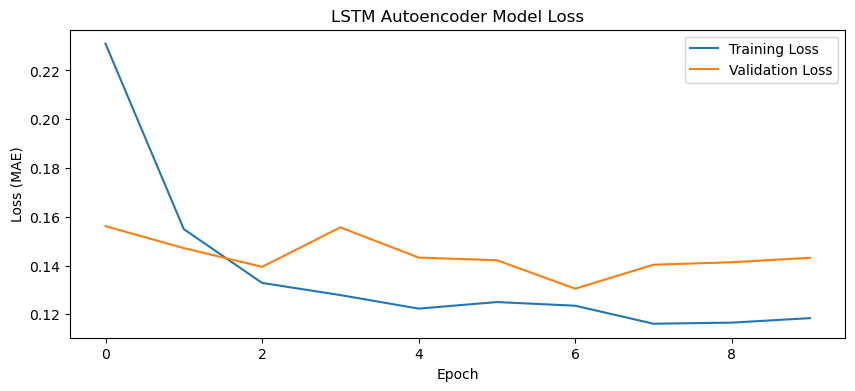


Calculating reconstruction errors...
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

Anomaly threshold (98th percentile of MAE): 0.2099

LSTM anomaly detection complete.

Analyzing LSTM Autoencoder results...

LSTM Autoencoder flagged 164 hours as anomalies (6.90% of total).

Comparison between LSTM and Rule-Based Anomalies:
Rule-Based (True=Any Anomaly)  False  True 
LSTM (True=Anomaly)                        
False                           1093   1120
True                               3    161

Comparison between LSTM and Isolation Forest Anomalies:
Isolation Forest (True=Anomaly)  False  True 
LSTM (True=Anomaly)                          
False                             2178     35
True                               151     13

Sample of data points flagged by LSTM ONLY:


,standardized_temperature,standardized_humidity,standardized_CO2CosIRValue,standardized_CO2MG811Value,standardized_MOX1,standardized_MOX2,standardized_MOX3,standardized_MOX4,standardized_COValue,hour,day_of_week,any_activity,anomaly_rule_based_any,anomaly_iforest,anomaly_lstm
timestamp,,,,,,,,,,,,,,,
2019-12-24 19:00:00,2.704123,-2.809831,1.405087,1.963525,-2.458000,-2.860837,-3.358230,-3.255250,0.037864,19,1,1.0,False,False,True
2019-12-24 20:00:00,3.501882,-2.903638,4.589299,0.234878,-3.860617,-3.921484,-4.019145,-4.064798,1.947718,20,1,1.0,False,False,True


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.losses import mae 
import matplotlib.pyplot as plt




print("Starting LSTM Autoencoder implementation...")





scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(model_data) 


timesteps = 12 
n_features = scaled_data.shape[1] 

print(f"\nCreating sequences with {timesteps} timesteps...")


def create_sequences(data, timesteps):
    X = []
    for i in range(len(data) - timesteps + 1):
        X.append(data[i:(i + timesteps)])
    return np.array(X)

sequences = create_sequences(scaled_data, timesteps)
print(f"Created {sequences.shape[0]} sequences of shape {sequences.shape[1:]}") 


X_train = sequences
y_train = sequences



print("\nBuilding LSTM Autoencoder model...")

model = Sequential()


model.add(LSTM(128, activation='relu', input_shape=(timesteps, n_features), return_sequences=False))

model.add(RepeatVector(timesteps)) 


model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features))) 

model.compile(optimizer='adam', loss='mae') 
model.summary()




epochs = 10 
batch_size = 32

print(f"\nTraining model for {epochs} epochs...")

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1, 
                    shuffle=False, 
                    verbose=1) 


plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Autoencoder Model Loss')
plt.ylabel('Loss (MAE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()



print("\nCalculating reconstruction errors...")

sequences_pred = model.predict(X_train)


train_mae_loss = np.mean(np.abs(sequences_pred - X_train), axis=(1, 2)) 





threshold = np.percentile(train_mae_loss, 98) 
print(f"\nAnomaly threshold (98th percentile of MAE): {threshold:.4f}")



error_index = model_data.index[timesteps - 1:]
reconstruction_errors = pd.Series(train_mae_loss, index=error_index)


anomaly_flags_lstm = reconstruction_errors > threshold



gas_pos_merged['anomaly_lstm'] = False

for i in anomaly_flags_lstm[anomaly_flags_lstm].index:
    
    start_seq_index = i - pd.Timedelta(hours=timesteps-1)
    gas_pos_merged.loc[start_seq_index:i, 'anomaly_lstm'] = True


print("\nLSTM anomaly detection complete.")


print("\nAnalyzing LSTM Autoencoder results...")

lstm_anomaly_count = gas_pos_merged['anomaly_lstm'].sum()
total_hours = len(gas_pos_merged)
lstm_anomaly_perc = (lstm_anomaly_count / total_hours) * 100

print(f"\nLSTM Autoencoder flagged {lstm_anomaly_count} hours as anomalies ({lstm_anomaly_perc:.2f}% of total).")


print("\nComparison between LSTM and Rule-Based Anomalies:")
comparison_table_lstm_rule = pd.crosstab(gas_pos_merged['anomaly_lstm'], gas_pos_merged['anomaly_rule_based_any'], rownames=['LSTM (True=Anomaly)'], colnames=['Rule-Based (True=Any Anomaly)'])
print(comparison_table_lstm_rule)

print("\nComparison between LSTM and Isolation Forest Anomalies:")
comparison_table_lstm_iforest = pd.crosstab(gas_pos_merged['anomaly_lstm'], gas_pos_merged['anomaly_iforest'], rownames=['LSTM (True=Anomaly)'], colnames=['Isolation Forest (True=Anomaly)'])
print(comparison_table_lstm_iforest)


print("\nSample of data points flagged by LSTM ONLY:")
lstm_only = gas_pos_merged[gas_pos_merged['anomaly_lstm'] & ~gas_pos_merged['anomaly_rule_based_any'] & ~gas_pos_merged['anomaly_iforest']]
display(lstm_only[feature_cols + ['anomaly_rule_based_any', 'anomaly_iforest', 'anomaly_lstm']].head(10))



Generating combined temperature anomaly plot...


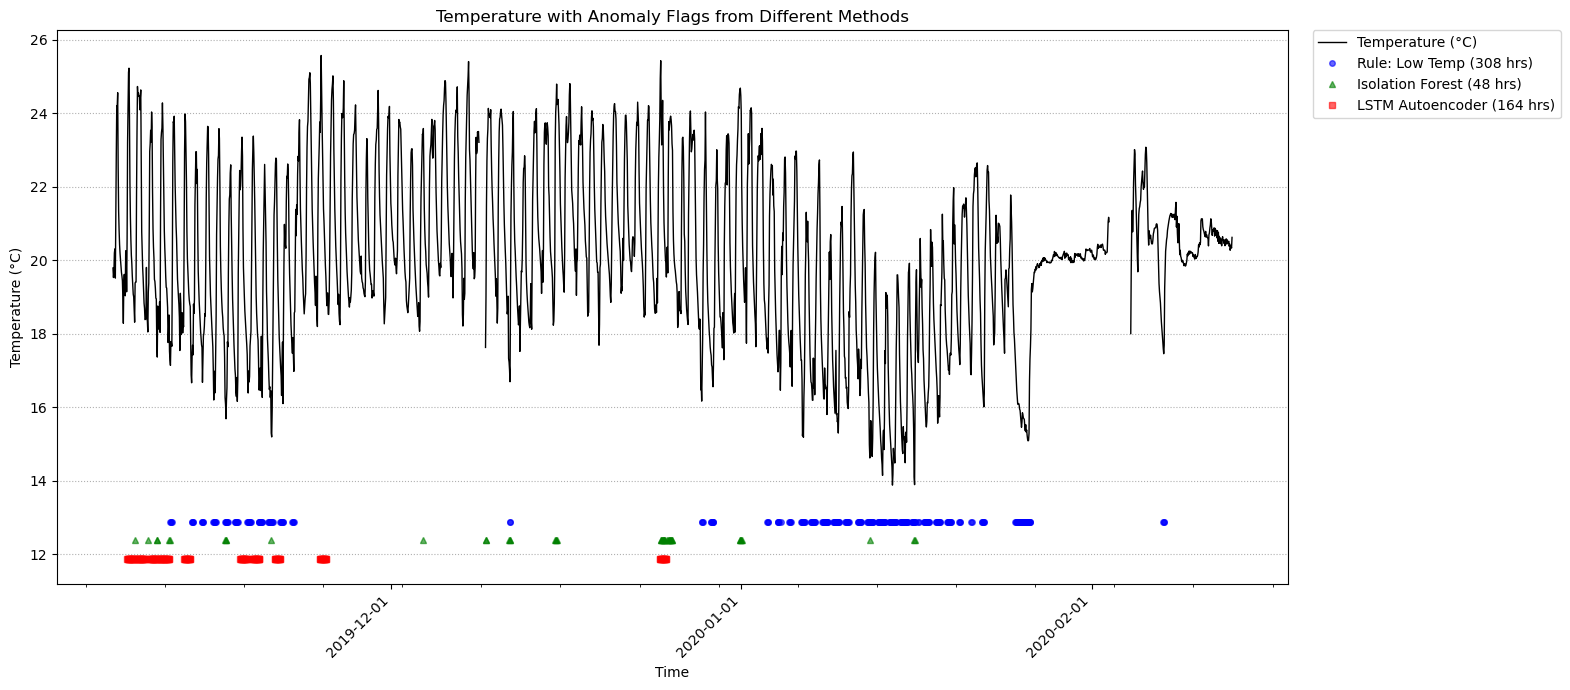

Plot generated.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np 




print("Generating combined temperature anomaly plot...")


required_cols = ['temperature', 'anomaly_low_temp', 'anomaly_iforest', 'anomaly_lstm']
if not all(col in gas_pos_merged.columns for col in required_cols):
    print(f"Error: Missing one or more required columns: {required_cols}")
else:
    fig, ax = plt.subplots(figsize=(18, 7)) 

    
    ax.plot(gas_pos_merged.index, gas_pos_merged['temperature'], label='Temperature (°C)', color='black', linewidth=1)
    ax.set_ylabel('Temperature (°C)')
    ax.set_xlabel('Time')
    ax.set_title('Temperature with Anomaly Flags from Different Methods')
    ax.grid(True, axis='y', linestyle=':')

    
    

    
    marker_y_rule = gas_pos_merged['temperature'].min() - 1
    marker_y_iforest = gas_pos_merged['temperature'].min() - 1.5
    marker_y_lstm = gas_pos_merged['temperature'].min() - 2

    
    ax.plot(gas_pos_merged.index[gas_pos_merged['anomaly_low_temp']],
            np.full(gas_pos_merged['anomaly_low_temp'].sum(), marker_y_rule),
            marker='o', linestyle='None', color='blue', markersize=4, alpha=0.6,
            label=f'Rule: Low Temp ({gas_pos_merged["anomaly_low_temp"].sum()} hrs)')

    ax.plot(gas_pos_merged.index[gas_pos_merged['anomaly_iforest']],
            np.full(gas_pos_merged['anomaly_iforest'].sum(), marker_y_iforest),
            marker='^', linestyle='None', color='green', markersize=4, alpha=0.6,
            label=f'Isolation Forest ({gas_pos_merged["anomaly_iforest"].sum()} hrs)')

    ax.plot(gas_pos_merged.index[gas_pos_merged['anomaly_lstm']],
            np.full(gas_pos_merged['anomaly_lstm'].sum(), marker_y_lstm),
            marker='s', linestyle='None', color='red', markersize=4, alpha=0.6,
            label=f'LSTM Autoencoder ({gas_pos_merged["anomaly_lstm"].sum()} hrs)')


    
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1)) 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) 

    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.) 
    plt.tight_layout(rect=[0, 0, 0.88, 1]) 
    plt.show()
    print("Plot generated.")



Generating combined standardized CO anomaly plot...


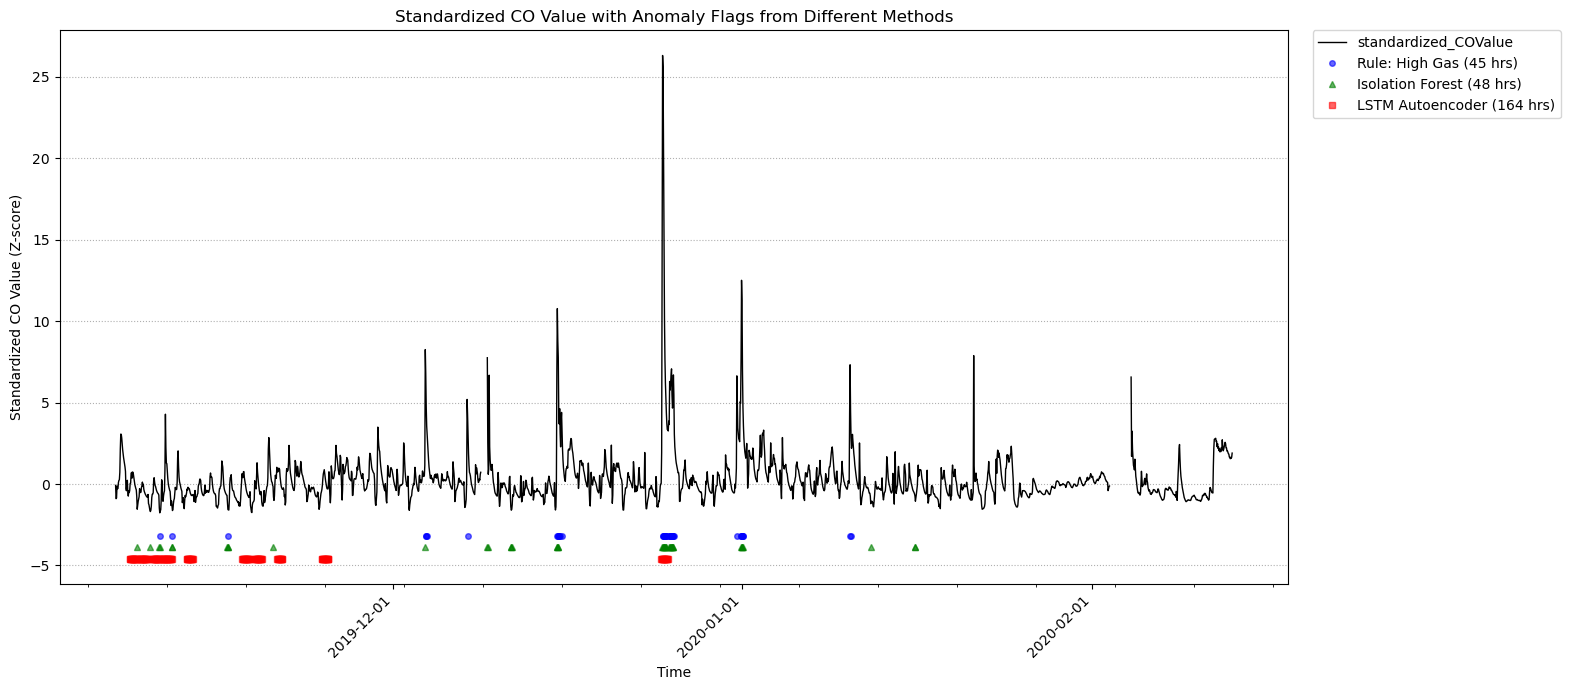

Plot generated.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np 




print("Generating combined standardized CO anomaly plot...")


co_col = 'standardized_COValue'
required_cols = [co_col, 'anomaly_high_gas', 'anomaly_iforest', 'anomaly_lstm']
if not all(col in gas_pos_merged.columns for col in required_cols):
    print(f"Error: Missing one or more required columns: {required_cols}")
else:
    fig, ax = plt.subplots(figsize=(18, 7)) 

    
    ax.plot(gas_pos_merged.index, gas_pos_merged[co_col], label=co_col, color='black', linewidth=1)
    ax.set_ylabel('Standardized CO Value (Z-score)')
    ax.set_xlabel('Time')
    ax.set_title('Standardized CO Value with Anomaly Flags from Different Methods')
    ax.grid(True, axis='y', linestyle=':')
    
    

    
    

    
    plot_min_y = gas_pos_merged[co_col].min()
    plot_max_y = gas_pos_merged[co_col].max()
    marker_offset = (plot_max_y - plot_min_y) * 0.05 
    marker_y_rule = plot_min_y - marker_offset
    marker_y_iforest = plot_min_y - marker_offset * 1.5
    marker_y_lstm = plot_min_y - marker_offset * 2.0

    
    ax.plot(gas_pos_merged.index[gas_pos_merged['anomaly_high_gas']],
            np.full(gas_pos_merged['anomaly_high_gas'].sum(), marker_y_rule),
            marker='o', linestyle='None', color='blue', markersize=4, alpha=0.6,
            label=f'Rule: High Gas ({gas_pos_merged["anomaly_high_gas"].sum()} hrs)')

    ax.plot(gas_pos_merged.index[gas_pos_merged['anomaly_iforest']],
            np.full(gas_pos_merged['anomaly_iforest'].sum(), marker_y_iforest),
            marker='^', linestyle='None', color='green', markersize=4, alpha=0.6,
            label=f'Isolation Forest ({gas_pos_merged["anomaly_iforest"].sum()} hrs)')

    ax.plot(gas_pos_merged.index[gas_pos_merged['anomaly_lstm']],
            np.full(gas_pos_merged['anomaly_lstm'].sum(), marker_y_lstm),
            marker='s', linestyle='None', color='red', markersize=4, alpha=0.6,
            label=f'LSTM Autoencoder ({gas_pos_merged["anomaly_lstm"].sum()} hrs)')


    
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1)) 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) 

    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.) 
    plt.tight_layout(rect=[0, 0, 0.88, 1]) 
    plt.show()
    print("Plot generated.")



Generating combined activity anomaly plot...


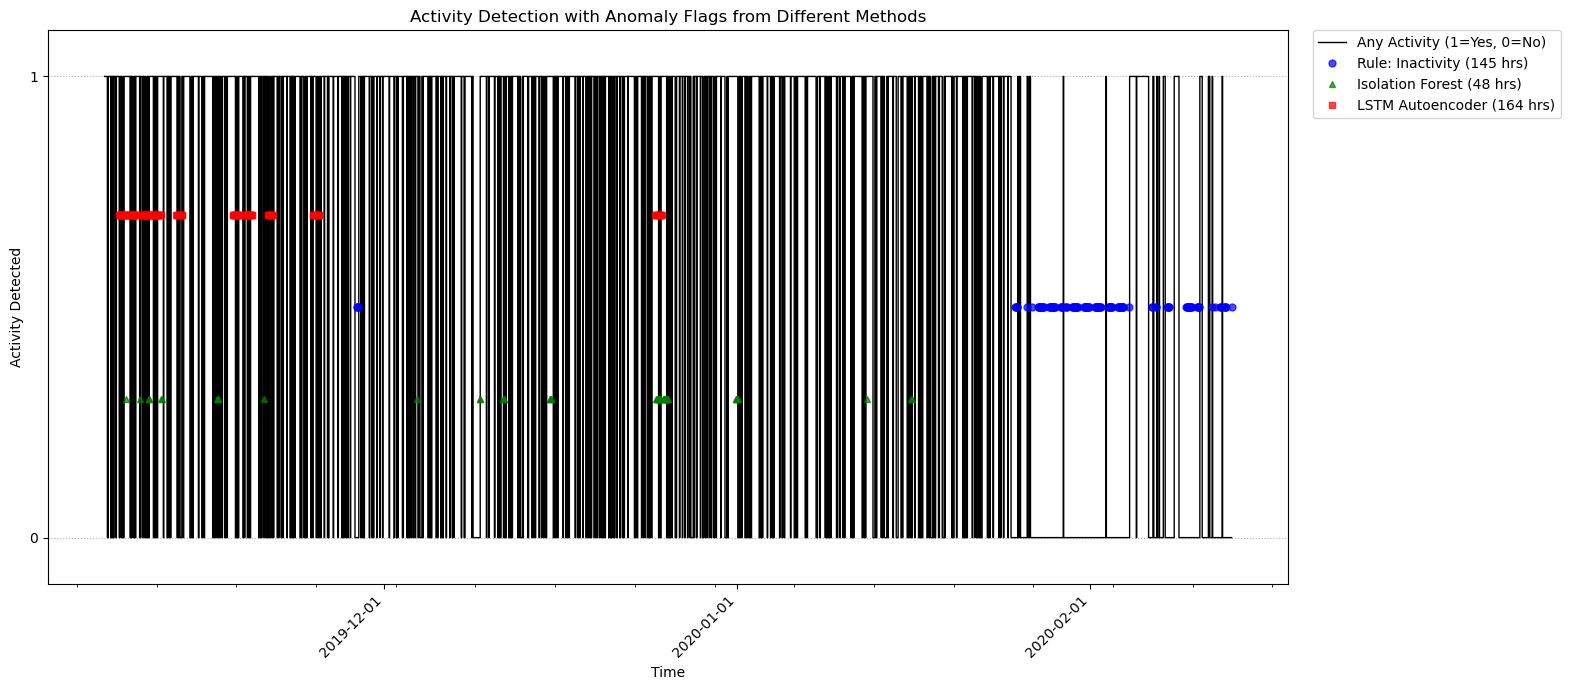

Plot generated.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np 




print("Generating combined activity anomaly plot...")


activity_col = 'any_activity'
required_cols = [activity_col, 'anomaly_inactivity', 'anomaly_iforest', 'anomaly_lstm']
if not all(col in gas_pos_merged.columns for col in required_cols):
    print(f"Error: Missing one or more required columns: {required_cols}")
else:
    fig, ax = plt.subplots(figsize=(18, 7)) 

    
    ax.step(gas_pos_merged.index, gas_pos_merged[activity_col], where='post', label='Any Activity (1=Yes, 0=No)', color='black', linewidth=1)
    ax.set_ylabel('Activity Detected')
    ax.set_xlabel('Time')
    ax.set_title('Activity Detection with Anomaly Flags from Different Methods')
    ax.grid(True, axis='y', linestyle=':')
    ax.set_yticks([0, 1]) 
    ax.set_ylim(-0.1, 1.1) 

    
    

    marker_y_rule = 0.5 
    marker_y_iforest = 0.3 
    marker_y_lstm = 0.7 

    
    ax.plot(gas_pos_merged.index[gas_pos_merged['anomaly_inactivity']],
            np.full(gas_pos_merged['anomaly_inactivity'].sum(), marker_y_rule),
            marker='o', linestyle='None', color='blue', markersize=5, alpha=0.7,
            label=f'Rule: Inactivity ({gas_pos_merged["anomaly_inactivity"].sum()} hrs)')

    ax.plot(gas_pos_merged.index[gas_pos_merged['anomaly_iforest']],
            np.full(gas_pos_merged['anomaly_iforest'].sum(), marker_y_iforest),
            marker='^', linestyle='None', color='green', markersize=5, alpha=0.7,
            label=f'Isolation Forest ({gas_pos_merged["anomaly_iforest"].sum()} hrs)')

    ax.plot(gas_pos_merged.index[gas_pos_merged['anomaly_lstm']],
            np.full(gas_pos_merged['anomaly_lstm'].sum(), marker_y_lstm),
            marker='s', linestyle='None', color='red', markersize=5, alpha=0.7,
            label=f'LSTM Autoencoder ({gas_pos_merged["anomaly_lstm"].sum()} hrs)')


    
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1)) 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) 

    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.) 
    plt.tight_layout(rect=[0, 0, 0.88, 1]) 
    plt.show()
    print("Plot generated.")



In [ ]:
import pandas as pd
import numpy as np






print("Implementing the two-level alert system...")



critical_rule_cols = ['anomaly_low_temp', 'anomaly_high_gas', 'anomaly_inactivity']

existing_critical_cols = [col for col in critical_rule_cols if col in gas_pos_merged.columns]
if not existing_critical_cols:
    print("Warning: No critical rule columns found!")
    gas_pos_merged['critical_rule_triggered'] = False
else:
    gas_pos_merged['critical_rule_triggered'] = gas_pos_merged[existing_critical_cols].any(axis=1)


all_anomaly_flags = [
    'anomaly_high_gas', 'anomaly_poor_vent', 'anomaly_low_temp',
    'anomaly_high_temp', 'anomaly_inactivity', 'anomaly_iforest', 'anomaly_lstm'
]

existing_anomaly_flags = [col for col in all_anomaly_flags if col in gas_pos_merged.columns]


print("Calculating Alert Level 1 triggers...")

gas_pos_merged['alert_level_1'] = False


if 'anomaly_poor_vent' in gas_pos_merged.columns:
    cond1_l1 = gas_pos_merged['anomaly_poor_vent']
    gas_pos_merged['alert_level_1'] = gas_pos_merged['alert_level_1'] | cond1_l1


if 'anomaly_iforest' in gas_pos_merged.columns:
    cond2_l1 = gas_pos_merged['anomaly_iforest'] & (~gas_pos_merged['critical_rule_triggered'])
    gas_pos_merged['alert_level_1'] = gas_pos_merged['alert_level_1'] | cond2_l1


if 'anomaly_lstm' in gas_pos_merged.columns:
    cond3_l1 = gas_pos_merged['anomaly_lstm'] & (~gas_pos_merged['critical_rule_triggered'])
    gas_pos_merged['alert_level_1'] = gas_pos_merged['alert_level_1'] | cond3_l1

print("Alert Level 1 calculated.")


print("Calculating Alert Level 2 triggers...")

gas_pos_merged['alert_level_2'] = False


cond1_l2 = gas_pos_merged['critical_rule_triggered']
gas_pos_merged['alert_level_2'] = gas_pos_merged['alert_level_2'] | cond1_l2


if existing_anomaly_flags:
    anomaly_sum = gas_pos_merged[existing_anomaly_flags].sum(axis=1)
    cond2_l2 = anomaly_sum >= 2
    gas_pos_merged['alert_level_2'] = gas_pos_merged['alert_level_2'] | cond2_l2
else:
    print("Warning: No anomaly flag columns found for multi-flag check!")


print("Alert Level 2 calculated.")


print("\nAnalyzing Alert Level results...")

alert1_count = gas_pos_merged['alert_level_1'].sum()
alert2_count = gas_pos_merged['alert_level_2'].sum()
total_hours = len(gas_pos_merged)

print(f"\nTotal hours flagged for Alert Level 1 (Warning): {alert1_count} ({alert1_count/total_hours*100:.2f}%)")
print(f"Total hours flagged for Alert Level 2 (Critical): {alert2_count} ({alert2_count/total_hours*100:.2f}%)")


level1_and_2 = (gas_pos_merged['alert_level_1'] & gas_pos_merged['alert_level_2']).sum()
print(f"\nHours flagged for BOTH Level 1 and Level 2: {level1_and_2}")
if alert2_count > 0:
    print(f"({level1_and_2 / alert2_count * 100:.2f}% of Level 2 alerts also met Level 1 criteria)")


print("\nSample of hours flagged ONLY for Level 1 (Warning):")
display(gas_pos_merged[gas_pos_merged['alert_level_1'] & ~gas_pos_merged['alert_level_2']].head())

print("\nSample of hours flagged for Level 2 (Critical):")
display(gas_pos_merged[gas_pos_merged['alert_level_2']].head())



Implementing the two-level alert system...
Calculating Alert Level 1 triggers...
Alert Level 1 calculated.
Calculating Alert Level 2 triggers...
Alert Level 2 calculated.

Analyzing Alert Level results...

Total hours flagged for Alert Level 1 (Warning): 905 (38.07%)
Total hours flagged for Alert Level 2 (Critical): 642 (27.01%)

Hours flagged for BOTH Level 1 and Level 2: 260
(40.50% of Level 2 alerts also met Level 1 criteria)

Sample of hours flagged ONLY for Level 1 (Warning):


,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue,Living room,...,anomaly_poor_vent,anomaly_low_temp,anomaly_high_temp,anomaly_inactivity,anomaly_iforest,anomaly_rule_based_any,anomaly_lstm,critical_rule_triggered,alert_level_1,alert_level_2
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-11-06 12:00:00,19.699111,51.239833,84.727778,616.772222,530.872222,760.505556,705.661111,622.116667,95.533333,1.0,...,True,False,False,False,False,True,False,False,True,False
2019-11-06 13:00:00,20.202778,49.903167,81.994444,618.461111,427.705556,757.966667,707.561111,625.294444,111.450000,0.0,...,True,False,False,False,False,True,False,False,True,False
2019-11-06 14:00:00,20.311944,50.692444,85.977778,615.988889,385.505556,753.555556,702.250000,621.472222,107.855556,1.0,...,True,False,False,False,False,True,False,False,True,False
2019-11-06 15:00:00,19.517598,53.560223,86.983240,616.396648,409.351955,751.960894,699.815642,621.206704,108.284916,1.0,...,True,False,False,False,False,True,False,False,True,False
2019-11-06 16:00:00,21.391667,51.769722,94.544444,611.138889,472.061111,745.366667,692.733333,618.666667,116.255556,NaN,...,True,False,False,False,False,True,False,False,True,False



Sample of hours flagged for Level 2 (Critical):


,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue,Living room,...,anomaly_poor_vent,anomaly_low_temp,anomaly_high_temp,anomaly_inactivity,anomaly_iforest,anomaly_rule_based_any,anomaly_lstm,critical_rule_triggered,alert_level_1,alert_level_2
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-11-07 16:00:00,20.605611,50.759222,82.383333,614.050000,509.372222,748.927778,704.438889,636.861111,105.533333,1.0,...,True,False,False,False,False,True,True,False,True,True
2019-11-07 17:00:00,23.208611,48.045667,91.316667,606.194444,494.500000,735.883333,689.511111,617.533333,115.177778,NaN,...,True,False,False,False,False,True,True,False,True,True
2019-11-07 18:00:00,24.288556,47.129389,98.244444,603.405556,485.361111,729.211111,682.555556,609.627778,115.394444,NaN,...,True,False,False,False,False,True,True,False,True,True
2019-11-07 19:00:00,25.117556,46.354667,105.266667,599.372222,403.400000,718.911111,669.294444,594.038889,128.350000,1.0,...,True,False,False,False,False,True,True,False,True,True
2019-11-07 20:00:00,25.231333,46.228944,108.472222,598.222222,383.788889,709.888889,652.911111,577.333333,129.761111,1.0,...,True,False,False,False,False,True,True,False,True,True


In [ ]:
import pandas as pd
import numpy as np

print("--- Testing Rule 3: Low Temperature with Synthetic Data ---")


timestamps = pd.date_range(start='2024-01-01 00:00:00', periods=6, freq='h')
synthetic_data = pd.DataFrame(index=timestamps)

synthetic_data['temperature'] = [20.0, 20.0, 17.0, 17.5, 17.9, 19.0]
synthetic_data['standardized_temperature'] = (synthetic_data['temperature'] - 20) / 2 

print("\nSynthetic Data Created:")
print(synthetic_data)

temp_low_abs = 18.0
temp_duration_window = 2 + 1 

synthetic_data['anomaly_low_temp'] = False


is_below_thresh = synthetic_data['temperature'] < temp_low_abs
condition_met_rolling = is_below_thresh.rolling(window=temp_duration_window).sum() == temp_duration_window

synthetic_data['anomaly_low_temp'] = condition_met_rolling

print(f"\nApplied Rule 3: Temp < {temp_low_abs}°C for > 2 consecutive hours (window={temp_duration_window})")

print("\nResults:")
print(synthetic_data[['temperature', 'anomaly_low_temp']])

expected_flags = [False, False, False, False, True, False] 
actual_flags = synthetic_data['anomaly_low_temp'].fillna(False).tolist() 
if actual_flags == expected_flags:
    print("\nTest PASSED: The rule correctly flagged the anomaly at the expected time.")
else:
    print("\nTest FAILED: The rule did not flag the anomaly as expected.")
    print(f"Expected: {expected_flags}")
    print(f"Actual:   {actual_flags}")



--- Testing Rule 3: Low Temperature with Synthetic Data ---

Synthetic Data Created:
                     temperature  standardized_temperature
2024-01-01 00:00:00         20.0                      0.00
2024-01-01 01:00:00         20.0                      0.00
2024-01-01 02:00:00         17.0                     -1.50
2024-01-01 03:00:00         17.5                     -1.25
2024-01-01 04:00:00         17.9                     -1.05
2024-01-01 05:00:00         19.0                     -0.50

Applied Rule 3: Temp < 18.0°C for > 2 consecutive hours (window=3)

Results:
                     temperature  anomaly_low_temp
2024-01-01 00:00:00         20.0             False
2024-01-01 01:00:00         20.0             False
2024-01-01 02:00:00         17.0             False
2024-01-01 03:00:00         17.5             False
2024-01-01 04:00:00         17.9              True
2024-01-01 05:00:00         19.0             False

Test PASSED: The rule correctly flagged the anomaly at the expecte

In [ ]:
import joblib
import pandas as pd

print("Saving models and supporting objects...")


joblib.dump(iso_forest, 'isolation_forest_model.joblib')
print("- Isolation Forest model saved to isolation_forest_model.joblib")

joblib.dump(scaler, 'min_max_scaler.joblib')
print("- MinMaxScaler saved to min_max_scaler.joblib")


model.save('lstm_autoencoder_model.keras')
print("- LSTM Autoencoder model saved to lstm_autoencoder_model.keras")


baseline_stats = pd.DataFrame({'mean': baseline_mean, 'std': baseline_std})
baseline_stats.to_csv('baseline_stats.csv')
print("- Baseline statistics saved to baseline_stats.csv")

print("\nAll objects saved successfully.")


Saving models and supporting objects...
- Isolation Forest model saved to isolation_forest_model.joblib
- MinMaxScaler saved to min_max_scaler.joblib
- LSTM Autoencoder model saved to lstm_autoencoder_model.keras
- Baseline statistics saved to baseline_stats.csv

All objects saved successfully.
